In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('Employee_Salary.csv')

In [89]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [90]:
df.shape

(375, 6)

In [91]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [93]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [94]:
df = df.dropna()

In [95]:
df.duplicated().sum()

49

In [96]:
df = df.drop_duplicates()

In [97]:
df.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


# Exploratory Data Analysis

In [98]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [99]:
df['Age'] = df['Age'].astype(int)

In [100]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,15.0,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0


In [101]:
x = df['Gender'].value_counts().index
y = df['Gender'].value_counts().values

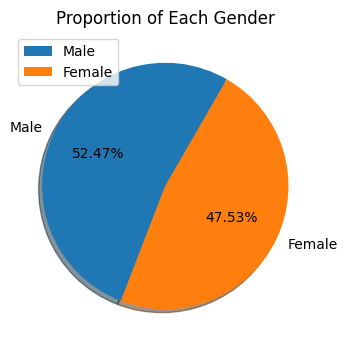

In [102]:
plt.figure(figsize=(5,4))
plt.pie(y ,labels=x, startangle=60,autopct="%0.2f%%",shadow=True)
plt.title("Proportion of Each Gender")
plt.legend(loc=2)
plt.show()

In [103]:
col_name = df.columns.to_list()
col_name

['Age',
 'Gender',
 'Education Level',
 'Job Title',
 'Years of Experience',
 'Salary']

In [104]:
data = df.drop(['Gender','Education Level','Job Title'], axis=1)
data

,Age,Years of Experience,Salary
0,32,5.0,90000.0
1,28,3.0,65000.0
2,45,15.0,150000.0
3,36,7.0,60000.0
4,52,20.0,200000.0
...,...,...,...
348,28,1.0,35000.0
349,36,8.0,110000.0
350,44,16.0,160000.0
351,31,3.0,55000.0


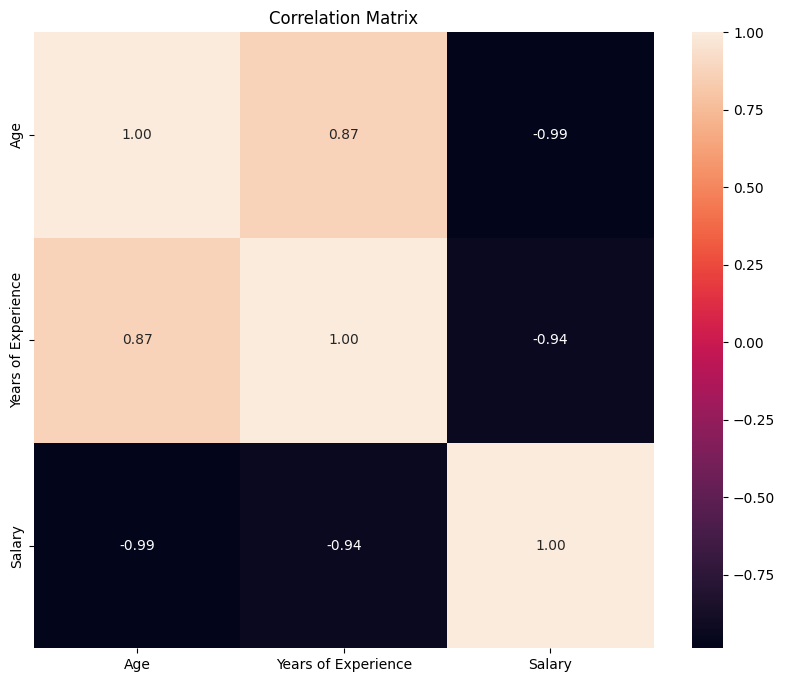

In [105]:
#correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

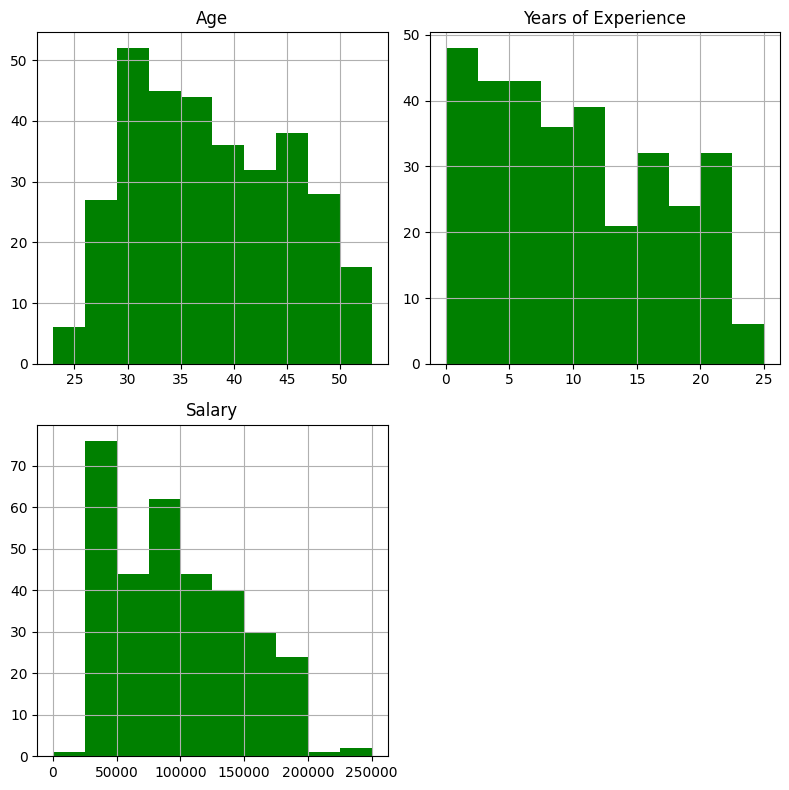

In [106]:
# Distribution of all data set
data.hist(figsize=(8,8), color = 'green', bins=10)
plt.tight_layout()
plt.show()

In [107]:
# to divide the age in 20 range for outcome with bar plot
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60], labels=['0-19', '20-39', '40-59'])
df['Age_Group'].value_counts()

Age_Group
20-39    210
40-59    114
0-19       0
Name: count, dtype: int64

In [108]:
# Group the data by age group and Gender and count the occurrences
age_gender = df.groupby(['Age_Group', 'Gender'])['Gender'].count().unstack()
df['Age_Group'].value_counts()

C:\Users\siddh\AppData\Local\Temp\ipykernel_20172\3216757017.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender = df.groupby(['Age_Group', 'Gender'])['Gender'].count().unstack()


Age_Group
20-39    210
40-59    114
0-19       0
Name: count, dtype: int64

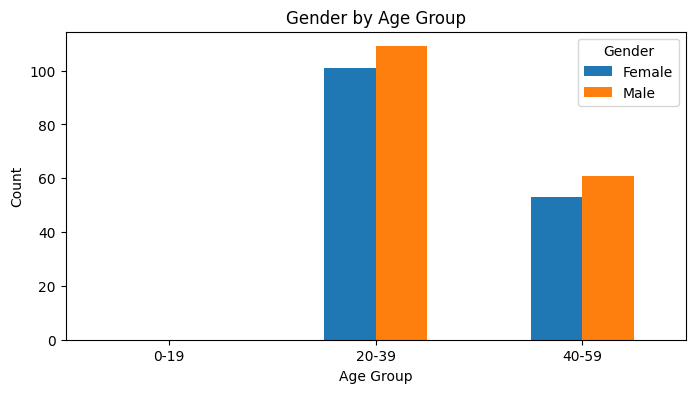

In [109]:
# Plot the bar chart
age_gender.plot(kind='bar', figsize=(8, 4))
plt.title('Gender by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

In [110]:
df['Education Level'].value_counts()

Education Level
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

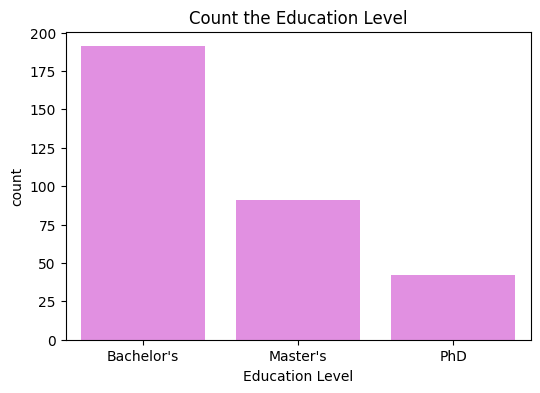

In [111]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'Education Level', data = df, color='violet')
plt.title("Count the Education Level")
plt.show()

In [112]:
x = df['Education Level'].value_counts().index
y = df['Education Level'].value_counts().values

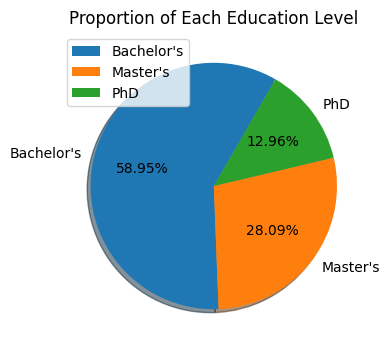

In [113]:
plt.figure(figsize=(5,4))
plt.pie(y ,labels=x, startangle=60,autopct="%0.2f%%",shadow=True)
plt.title("Proportion of Each Education Level")
plt.legend(loc=2)
plt.show()

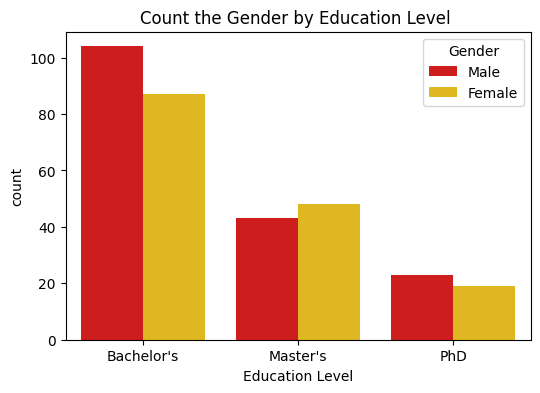

In [114]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'Education Level', data = df, hue='Gender',  palette='hot')
plt.title("Count the Gender by Education Level ")
plt.show()

In [115]:
df['Years of Experience'].value_counts()

Years of Experience
3.0     27
2.0     26
9.0     19
8.0     17
5.0     16
7.0     16
4.0     16
10.0    16
16.0    15
12.0    14
20.0    13
19.0    13
15.0    12
21.0    11
1.5     11
14.0    11
6.0     11
18.0    11
13.0    10
11.0     9
22.0     8
1.0      7
17.0     5
25.0     3
0.0      3
23.0     2
24.0     1
0.5      1
Name: count, dtype: int64

In [116]:
Experience_gender = df.groupby(['Gender', 'Years of Experience']).agg({'Salary': 'sum'}).reset_index()
Experience_gender.value_counts()

Gender  Years of Experience  Salary   
Female  0.0                  35000.0      1
Male    0.0                  65000.0      1
        1.5                  145350.0     1
        2.0                  670000.0     1
        3.0                  705000.0     1
        4.0                  610000.0     1
        5.0                  335000.0     1
        6.0                  505000.0     1
        7.0                  1130000.0    1
        8.0                  1115000.0    1
        9.0                  1235000.0    1
        10.0                 565000.0     1
        11.0                 440000.0     1
        12.0                 355000.0     1
        13.0                 400000.0     1
        14.0                 635000.0     1
        15.0                 270000.0     1
        16.0                 1255000.0    1
        17.0                 455000.0     1
        18.0                 885000.0     1
        19.0                 2005000.0    1
        20.0                 1475000.

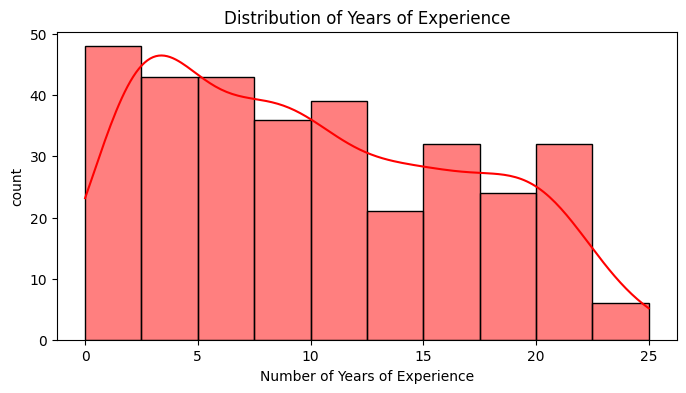

In [117]:
# Plotting the distribution of Years of Experience
plt.figure(figsize=(8, 4))
sns.histplot(x = 'Years of Experience', data = df, kde=True, color='red')
plt.title('Distribution of Years of Experience')
plt.xlabel('Number of Years of Experience')
plt.ylabel('count')
plt.show()

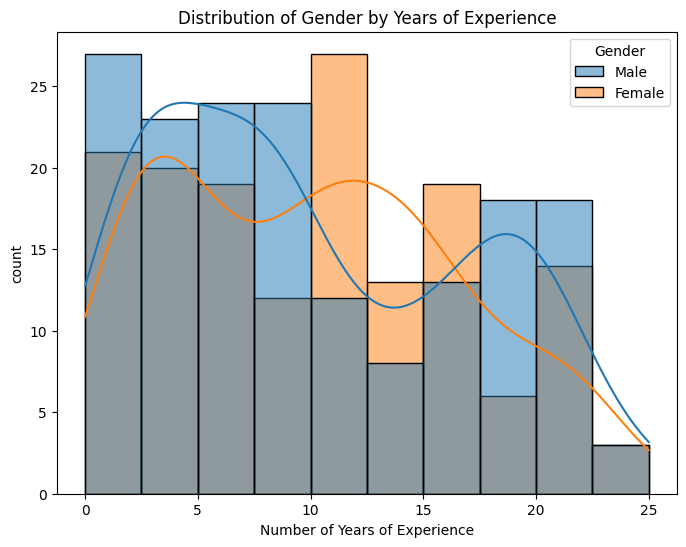

In [118]:
# Plotting the distribution of Years of Experience
plt.figure(figsize=(8, 6))
sns.histplot(x = 'Years of Experience', data = df, hue = 'Gender',kde=True)
plt.title('Distribution of Gender by Years of Experience')
plt.xlabel('Number of Years of Experience')
plt.ylabel('count')
plt.show()

In [119]:
df['Salary'].value_counts()

Salary
40000.0     26
120000.0    20
50000.0     19
95000.0     18
45000.0     18
180000.0    17
90000.0     15
110000.0    14
160000.0    14
140000.0    14
60000.0     13
170000.0    13
80000.0     12
100000.0    12
35000.0     12
150000.0    12
130000.0    11
55000.0     10
65000.0      9
70000.0      8
105000.0     6
85000.0      5
190000.0     4
75000.0      4
115000.0     3
250000.0     2
200000.0     2
135000.0     2
175000.0     2
125000.0     1
30000.0      1
220000.0     1
185000.0     1
145000.0     1
155000.0     1
350.0        1
Name: count, dtype: int64

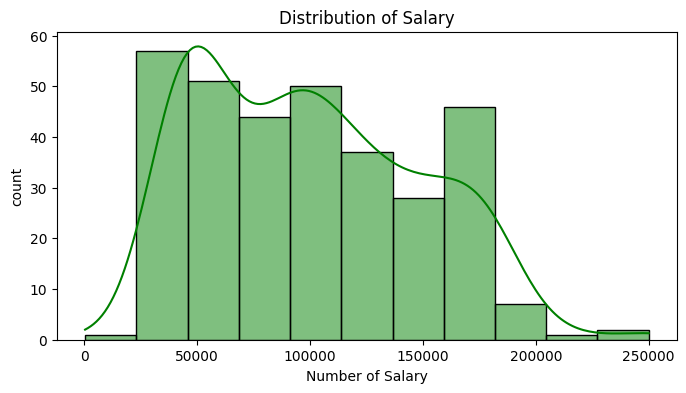

In [120]:
# Plotting the distribution of Years of Experience
plt.figure(figsize=(8, 4))
sns.histplot(x = 'Salary', data = df, kde=True, color='green')
plt.title('Distribution of Salary')
plt.xlabel('Number of Salary')
plt.ylabel('count')
plt.show()

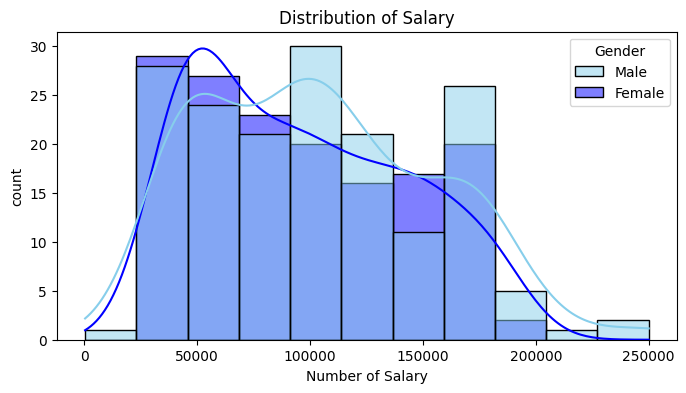

In [121]:
# Plotting the distribution of Years of Experience
plt.figure(figsize=(8, 4))
sns.histplot(x = 'Salary', data = df, kde=True, hue='Gender', palette=['skyblue','blue'])
plt.title('Distribution of Salary')
plt.xlabel('Number of Salary')
plt.ylabel('count')
plt.show()

In [122]:
# Group the data by age group and Salary and count the occurrences
age_salary = df.groupby(['Gender', 'Age_Group','Salary']).agg({'Salary':'sum'})

C:\Users\siddh\AppData\Local\Temp\ipykernel_20172\4029798044.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_salary = df.groupby(['Gender', 'Age_Group','Salary']).agg({'Salary':'sum'})


In [123]:
age_salary = pd.DataFrame(age_salary)

In [124]:
age_salary

Salary
Gender Age_Group Salary            
Female 0-19      350.0          0.0
                 30000.0        0.0
                 35000.0        0.0
                 40000.0        0.0
                 45000.0        0.0
...                             ...
Male   40-59     185000.0       0.0
                 190000.0  570000.0
                 200000.0  400000.0
                 220000.0  220000.0
                 250000.0  500000.0

[216 rows x 1 columns]

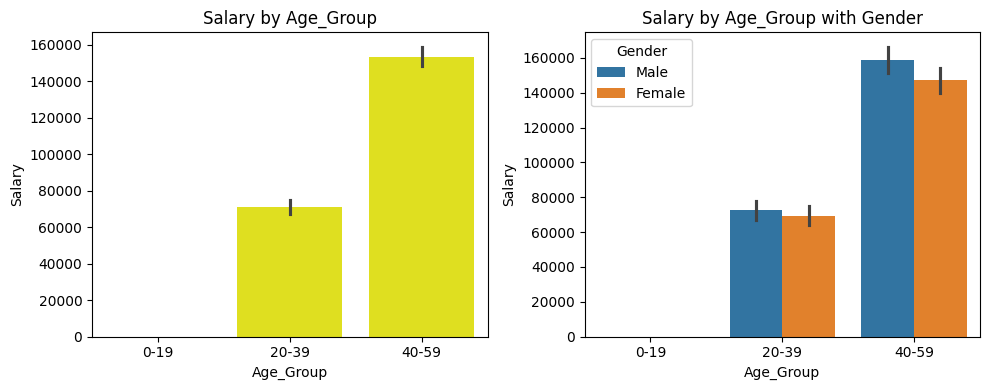

In [125]:
# Visualizations
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='Age_Group', y='Salary', data=df, color='yellow')
plt.title('Salary by Age_Group')

plt.subplot(1, 2, 2)
sns.barplot(x='Age_Group', y='Salary', data=df, hue='Gender')
plt.title('Salary by Age_Group with Gender')

plt.tight_layout()
plt.show()

In [126]:
Experience_salary = df.groupby(['Education Level', 'Salary']).agg({'Gender': 'count'}).reset_index()
Experience_salary

,Education Level,Salary,Gender
0,Bachelor's,350.0,1
1,Bachelor's,30000.0,1
2,Bachelor's,35000.0,12
3,Bachelor's,40000.0,25
4,Bachelor's,45000.0,16
...,...,...,...
60,PhD,180000.0,5
61,PhD,185000.0,1
62,PhD,190000.0,1
63,PhD,220000.0,1


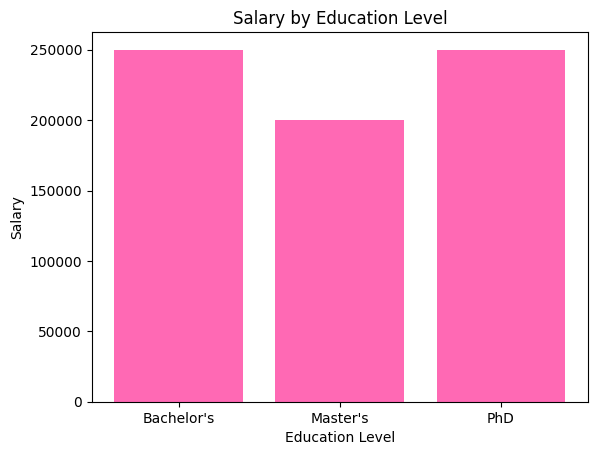

In [127]:
plt.bar(x = df['Education Level'], height=df['Salary'], color='hotpink')
plt.title('Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

# Label Encoding

In [128]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [129]:
Label_Encoder = LabelEncoder()

In [130]:
df['Gender'] = Label_Encoder.fit_transform(df['Gender'])

In [131]:
df['Education Level'] = Label_Encoder.fit_transform(df['Education Level'])

In [132]:
df['Job Title'] = Label_Encoder.fit_transform(df['Job Title'])

In [133]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age_Group
0,32,1,0,159,5.0,90000.0,20-39
1,28,0,1,17,3.0,65000.0,20-39
2,45,1,2,130,15.0,150000.0,40-59
3,36,0,0,101,7.0,60000.0,20-39
4,52,1,1,22,20.0,200000.0,40-59


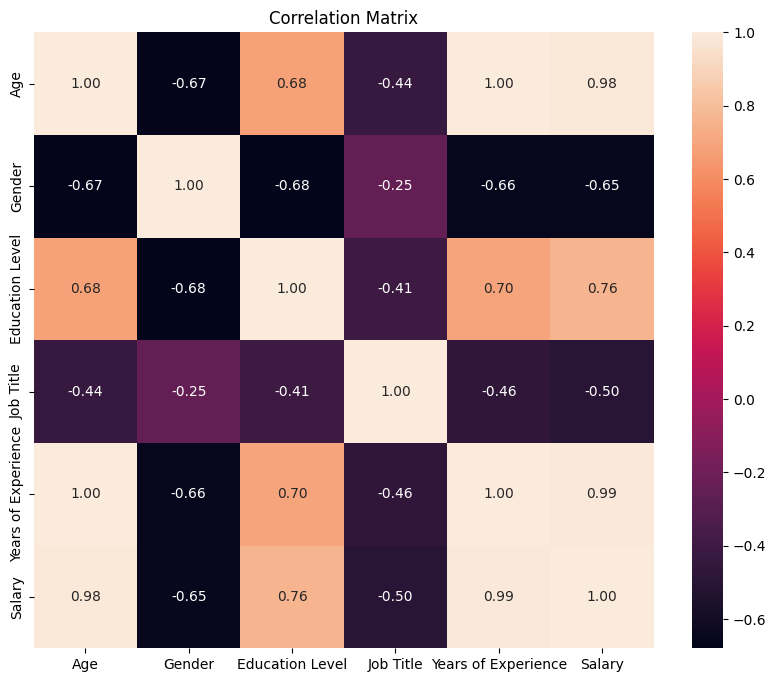

In [134]:
#correlation matrix
corr_matrix = df.drop('Age_Group', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Implements Linear Regression model 

In [135]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [136]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age_Group
0,32,1,0,159,5.0,90000.0,20-39
1,28,0,1,17,3.0,65000.0,20-39
2,45,1,2,130,15.0,150000.0,40-59
3,36,0,0,101,7.0,60000.0,20-39
4,52,1,1,22,20.0,200000.0,40-59


In [137]:
# Selecting relevant features for regression
X = df.drop(['Salary', 'Age_Group'], axis=1)
y = df['Salary']

In [138]:
X, y

(     Age  Gender  Education Level  Job Title  Years of Experience
 0     32       1                0        159                  5.0
 1     28       0                1         17                  3.0
 2     45       1                2        130                 15.0
 3     36       0                0        101                  7.0
 4     52       1                1         22                 20.0
 ..   ...     ...              ...        ...                  ...
 348   28       0                0         68                  1.0
 349   36       1                0        111                  8.0
 350   44       0                2        115                 16.0
 351   31       1                0         63                  3.0
 371   43       1                1         30                 19.0
 
 [324 rows x 5 columns],
 0       90000.0
 1       65000.0
 2      150000.0
 3       60000.0
 4      200000.0
          ...   
 348     35000.0
 349    110000.0
 350    160000.0
 351     55000.0

In [139]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [140]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((259, 5), (65, 5), (259,), (65,))

In [141]:
# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
# Define the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [143]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [144]:
# Make predictions
y_pred = model.predict(X_test)

In [145]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [155]:
print("Linear Regression")
print("Mean Squared Error : ",mse)
print("R2 Score : ",r2)

Linear Regression
Mean Squared Error :  0.00887123106
R2 Score :  0.8911231066517087


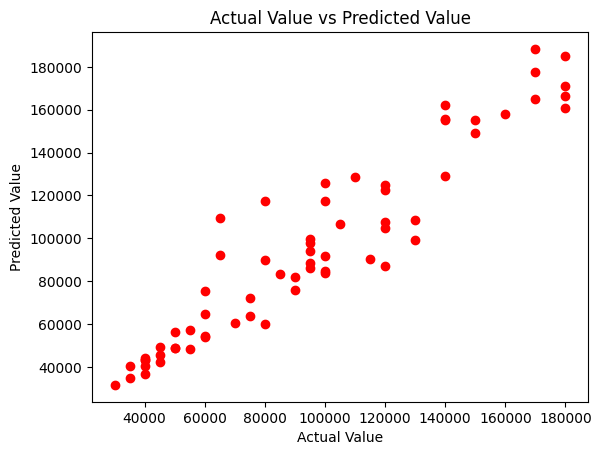

In [147]:
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Value vs Predicted Value")
plt.show()

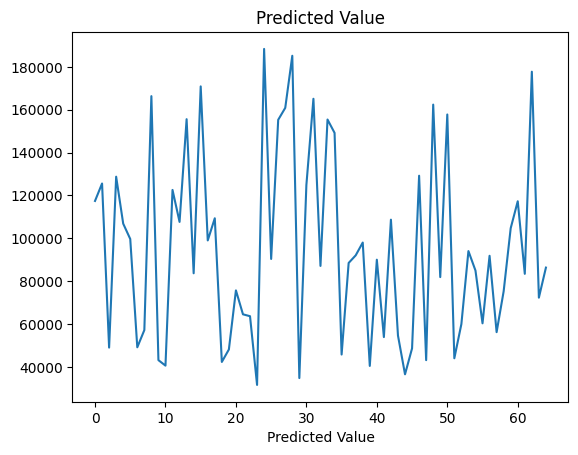

In [148]:
plt.plot(y_pred)
plt.xlabel("Predicted Value")
plt.title("Predicted Value")
plt.show()

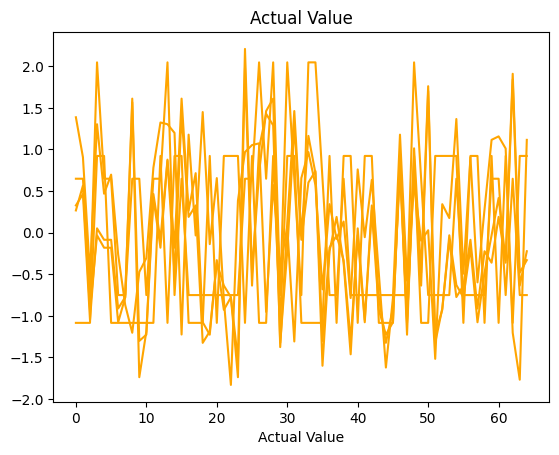

In [149]:
plt.plot(X_test, color='orange')
plt.xlabel("Actual Value")
plt.title("Actual Value")
plt.show()

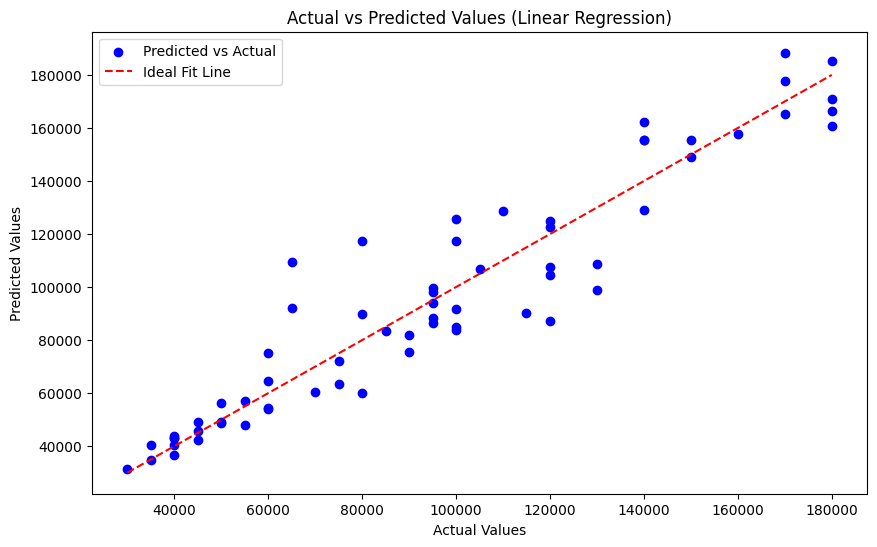

In [150]:
# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue',label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.show()

In [151]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age_Group
0,32,1,0,159,5.0,90000.0,20-39
1,28,0,1,17,3.0,65000.0,20-39
2,45,1,2,130,15.0,150000.0,40-59
3,36,0,0,101,7.0,60000.0,20-39
4,52,1,1,22,20.0,200000.0,40-59


In [156]:
# changing the i|nput_data to numpy array
input_data = [32,1,0,159,5.0]
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = model.predict(std_data)
print(prediction)

[66731.98546376]


C:\Users\siddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [153]:
# import pickle
# # Save the model to a pickle file
# with open('Employee_Salary.pkl', 'wb') as file:
#     pickle.dump(model, file)
# print("Regression model saved as Employee_Salary.pkl")